In [1]:
# read data and data pre-process
import pandas as pd
import numpy as np

df = pd.read_json('business.json')
df = df.T
df.set_index('name',inplace=True)
df.drop(['state','categories'],inplace=True,axis=1)

# extract all the features
dic={}
i = 0
for row in df.itertuples():
    for key,value in getattr(row, 'attributes').items():
        if key not in dic.keys():
            dic[key] = value
    i += 1
dic.pop('Ambience')
dic.pop('RestaurantsAttire')
dic.pop('RestaurantsPriceRange2')
dic_list = list(dic.keys())        

In [2]:
# using binary to represent the True or False
#take long time to run, about 2-3h
def features_binary(df):
    HasTV_list = np.zeros([len(df)])
    BusinessParking_list = np.zeros([len(df)])
    WiFi_list = np.zeros([len(df)])
    Alcohol_list = np.zeros([len(df)])
    OutdoorSeating_list = np.zeros([len(df)])
    RestaurantsReservations_list = np.zeros([len(df)])
    BikeParking_list = np.zeros([len(df)])
    GoodForKids_list = np.zeros([len(df)])

    for i in range(len(df)):
    #     'HasTV'
        if 'HasTV' in df['attributes'][i].keys():
            if 'True' in df['attributes'][i]['HasTV']:
                HasTV_list[i] = 1
    #     'BusinessParking'
        if 'BusinessParking' in df['attributes'][i].keys():
            if 'True' in df['attributes'][i]['BusinessParking']:
                BusinessParking_list[i] = 1
    #     'WiFi'
        if 'WiFi' in df['attributes'][i].keys():
            if 'no' not in df['attributes'][i]['WiFi']:
                WiFi_list[i] = 1
    #     'Alcohol'
        if 'Alcohol' in df['attributes'][i].keys():
            if u'none' not in df['attributes'][i]['Alcohol']:
                Alcohol_list[i] = 1
    #     'OutdoorSeating'
        if 'OutdoorSeating' in df['attributes'][i].keys():
            if 'True'in df['attributes'][i]['OutdoorSeating']:
                OutdoorSeating_list[i] = 1 
    #     'RestaurantsReservations'
        if 'RestaurantsReservations' in df['attributes'][i].keys():
            if 'True'in df['attributes'][i]['RestaurantsReservations']:
                RestaurantsReservations_list[i] = 1
    #     'BikeParking'
        if 'BikeParking' in df['attributes'][i].keys():
            if 'True'in df['attributes'][i]['BikeParking']:
                BikeParking_list[i] = 1
    #     'GoodForKids'
        if 'GoodForKids' in df['attributes'][i].keys():
            if 'True'in df['attributes'][i]['GoodForKids']:
                GoodForKids_list[i] = 1
                
    attr = np.vstack((HasTV_list, BusinessParking_list, WiFi_list, Alcohol_list, OutdoorSeating_list, RestaurantsReservations_list,
                      BikeParking_list,GoodForKids_list))
    return attr.T

#Test
dis = features_binary(df)
print(dis.shape)


(61789, 8)


In [4]:
dis[:20]

array([[1., 1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1., 1.],
       [1., 0., 1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1., 1., 0., 0.]])

In [14]:
# using binary to represent the stars: high >= 4   low < 4
def extract_star(df):
    stars = np.zeros(len(df['stars']))
#     stars = np.zeros(len(df['stars']))
    for i, item in enumerate(df['stars']):
        if item >= 4:
            stars[i] = 1
    return stars

#    Test
stars = extract_star(df)
print(stars)


#     Calculate Euclidean Distance and Test
def Cal_distance(x, y):
    return np.sqrt(np.sum(np.square(x - y)))

#    Test
print(Cal_distance(dis[10000],dis[10000]))


[1. 1. 1. ... 1. 0. 0.]
0.0


In [9]:
# find the value of k using sklearn

from sklearn import neighbors

def find_k(dis,stars):
    k_table = [1,2,3,4,5,6,7,8]
    acc_sklearn = np.zeros(len(k_table))
    X_train = dis[10000:]
    Y_train = stars[10000:]
    X_test = dis[:10000]
    Y_test = stars[:10000]
    for k in range(7):
        knn = neighbors.KNeighborsClassifier(n_neighbors = k+1)
        knn.fit(X_train, Y_train)
        result_sklearn = knn.predict(X_test)
        result_sklearn_accurcy = result_sklearn == stars[:10000]
        # print(result_sklearn_accurcy)
        acc_sklearn[k] = len(np.extract(result_sklearn_accurcy, result_sklearn_accurcy==True))/len(result_sklearn_accurcy)
        
    return k_table, acc_sklearn

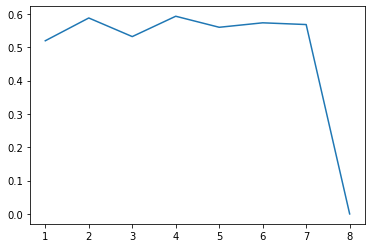

In [10]:
import matplotlib.pyplot as plt

skresult = find_k(dis,stars)
plt.plot(skresult[0],skresult[1])

In [11]:
#    import collections to implenment a counter
from collections import Counter

#    predict one point
def knn(point,data,stars_table,k=4):
   
    #     create a table to store all the distances
    dist_table = np.zeros(data.shape[0]) 
    for i in range(data.shape[0]):
        dist_table[i] = Cal_distance(point, data[i])
        
    # find k nearest neighbors index
    # find k nearest neighbors star accroding to the index    
    knn_star = np.zeros(k)
    for i, item in enumerate(np.argsort(dist_table)[:k]):
        knn_star[i] = stars[item]
    # predict
    predict_p = Counter(knn_star).most_common(1)
    return predict_p[0]

# knn(dis[97],dis[100:60000],stars,4)

#    predict an array
def knn_arr(test_set,train_set, stars_table, k=4):
    pred = np.zeros(len(test_set))
    for i,item in enumerate(test_set):
        pred[i] = knn(item, train_set,stars_table, k)[0]
    return pred

In [13]:
# predict and evaluation
#take long time to run, about 1-2h
result_0_100 = knn_arr(dis[:10000],dis[10000:],stars,4)
result_0_100_accurcy = result_0_100 == stars[:10000]
acc = len(np.extract(result_0_100_accurcy, result_0_100_accurcy==True))/len(result_0_100)
acc

0.5331